In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part I: Analysis of the COVID-19 dataset

# First Task: Importing dataset and data cleaning

# Importing COVID-19 dataset

In [2]:
df_covid = pd.read_csv ('time_series_covid19_deaths_global.csv')
df_covid.head()
df_covid.shape

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,125,125,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,596,600,602,603,609,618,622,628,630,633


(275, 478)

# Performing some data cleaning

In [3]:
#Dropping "Lat" and "Long" columns
df_covid.drop(["Lat","Long"], axis=1, inplace=True)


In [4]:
df_covid.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,125,125,127,127,127,127,127,127,127,127
4,NaN,Angola,0,0,0,0,0,0,0,0,...,596,600,602,603,609,618,622,628,630,633


In [5]:
#Aggreagting by Country
df_covid_aggregated =  df_covid.groupby("Country/Region").sum()

In [6]:
df_covid_aggregated.head()
df_covid_aggregated.shape

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686
Albania,0,0,0,0,0,0,0,0,0,0,...,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412
Algeria,0,0,0,0,0,0,0,0,0,0,...,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328
Andorra,0,0,0,0,0,0,0,0,0,0,...,125,125,127,127,127,127,127,127,127,127
Angola,0,0,0,0,0,0,0,0,0,0,...,596,600,602,603,609,618,622,628,630,633


(192, 474)

# Visualization by Country

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

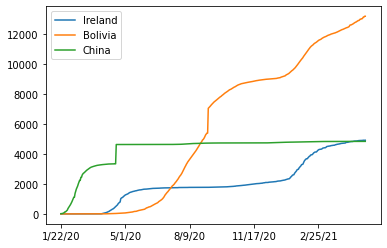

In [7]:
df_covid_aggregated.loc["Ireland"].plot()
df_covid_aggregated.loc["Bolivia"].plot()
df_covid_aggregated.loc["China"].plot()
plt.legend()

# SECOND TASK: Find a good Measure for the Data Analysis

<AxesSubplot:>

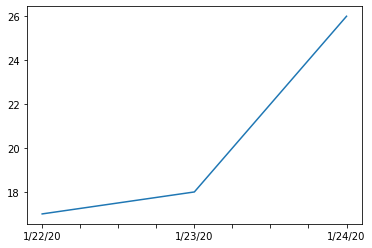

In [8]:
#Visualization just for three days
df_covid_aggregated.loc["China"][:3].plot()

<AxesSubplot:>

1290.0

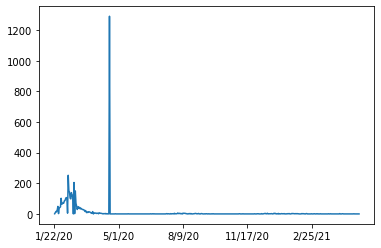

In [9]:
#Calculating and plotting of the maximum number of new infected cases by day (derivative)
df_covid_aggregated.loc["China"].diff().plot() # the graph shows the number of new cases by day 
df_covid_aggregated.loc["China"].diff().max()  # This represents the max number in one day of new inffected cases->
#this is going to be the paremeter we are going to measure.

# CREATING A FOR LOOP TO GET THE MAC NUMBER OF INFECTED BY COUNTRY

In [10]:
#CREATING A FUNCTION TO HAVE A LIST OF THE NU
list1 = []

for country in df_covid_aggregated.index:
        x = df_covid_aggregated.loc[country].diff().max()
        list1.append(x)
       
    


In [11]:
list1

[46.0,
 21.0,
 30.0,
 6.0,
 12.0,
 5.0,
 3351.0,
 41.0,
 59.0,
 218.0,
 47.0,
 15.0,
 7.0,
 112.0,
 3.0,
 11.0,
 496.0,
 16.0,
 9.0,
 1.0,
 1656.0,
 207.0,
 62.0,
 4249.0,
 1.0,
 248.0,
 5.0,
 48.0,
 3.0,
 5.0,
 10.0,
 130.0,
 244.0,
 7.0,
 10.0,
 1057.0,
 1290.0,
 687.0,
 12.0,
 24.0,
 196.0,
 59.0,
 6.0,
 92.0,
 18.0,
 8.0,
 295.0,
 60.0,
 2.0,
 9.0,
 0.0,
 39.0,
 3852.0,
 97.0,
 31.0,
 32.0,
 3.0,
 17.0,
 24.0,
 47.0,
 1.0,
 43.0,
 1438.0,
 5.0,
 14.0,
 53.0,
 1734.0,
 28.0,
 134.0,
 1.0,
 61.0,
 4.0,
 5.0,
 9.0,
 7.0,
 0.0,
 83.0,
 311.0,
 5.0,
 4187.0,
 476.0,
 496.0,
 122.0,
 220.0,
 101.0,
 993.0,
 16.0,
 248.0,
 111.0,
 324.0,
 41.0,
 40.0,
 69.0,
 14.0,
 727.0,
 1.0,
 44.0,
 351.0,
 25.0,
 17.0,
 53.0,
 4.0,
 61.0,
 29.0,
 2.0,
 26.0,
 73.0,
 26.0,
 5.0,
 11.0,
 7.0,
 0.0,
 13.0,
 3.0,
 3050.0,
 0.0,
 46.0,
 3.0,
 23.0,
 18.0,
 92.0,
 58.0,
 24.0,
 619.0,
 234.0,
 4.0,
 18.0,
 7.0,
 31.0,
 51.0,
 27.0,
 67.0,
 313.0,
 61.0,
 11.0,
 141.0,
 4143.0,
 401.0,
 956.0,
 303.0,
 10.0

In [12]:
df_covid_aggregated['Max_Infected'] = list1
df_covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,Max_Infected
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2631,2637,2642,2648,2654,2664,2673,2683,2686,46.0
Albania,0,0,0,0,0,0,0,0,0,0,...,2396,2397,2399,2402,2403,2406,2408,2411,2412,21.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,3261,3270,3280,3289,3299,3307,3315,3321,3328,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,125,127,127,127,127,127,127,127,127,6.0
Angola,0,0,0,0,0,0,0,0,0,0,...,600,602,603,609,618,622,628,630,633,12.0


In [13]:
df_covid_aggregated.drop(df_covid_aggregated.iloc[:, 0:474], axis=1, inplace=True)


#  Just keeping the name of the country along with max infected number

In [14]:
df_covid_aggregated.head()


,Max_Infected
Country/Region,
Afghanistan,46.0
Albania,21.0
Algeria,30.0
Andorra,6.0
Angola,12.0


# Part II: Analysis of the happiness dataset 

In [25]:
df_hapiness = pd.read_csv('2019.csv')
df_hapiness.head()
df_hapiness.shape

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


(156, 9)

In [16]:
useless_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
df_hapiness.drop(useless_cols, axis =1, inplace =True)


In [17]:
df_hapiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [18]:
#Changing the indices of the dataframe
df_hapiness.set_index('Country or region', inplace=True)
df_hapiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


# Part III: Joining the two datasets and performing the final data analysis

In [19]:
#Joining the two datasets
df_covid_aggregated.shape
df_hapiness.shape

(192, 1)

(156, 4)

In [20]:
final_df = df_covid_aggregated.join(df_hapiness, how = 'inner')
final_df.head()

,Max_Infected,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,46.0,0.350,0.517,0.361,0.000
Albania,21.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,3351.0,1.092,1.432,0.881,0.471
Armenia,41.0,0.850,1.055,0.815,0.283


In [21]:
#Correlation Matrix to see how this factors aaffect the number of infected people
final_df.corr()

,Max_Infected,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infected,1.000000,0.144568,0.140473,0.191671,0.120997
GDP per capita,0.144568,1.000000,0.757521,0.859431,0.394799
Social support,0.140473,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.191671,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.120997,0.394799,0.456317,0.423146,1.000000


# Part IV: VISUALIZATION THE RESULTS

In [22]:
final_df.head()

,Max_Infected,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,46.0,0.350,0.517,0.361,0.000
Albania,21.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,3351.0,1.092,1.432,0.881,0.471
Armenia,41.0,0.850,1.055,0.815,0.283


C:\Users\Pamela\Anaconda3\envs\New hgp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infected'>

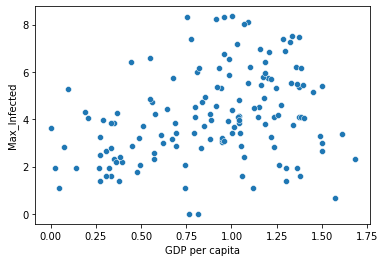

In [23]:
# PLOTTING GDP vs Max_Infected
x= final_df ['GDP per capita']
y= final_df['Max_Infected']
sns.scatterplot(x,np.log(y))

C:\Users\Pamela\Anaconda3\envs\New hgp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infected'>

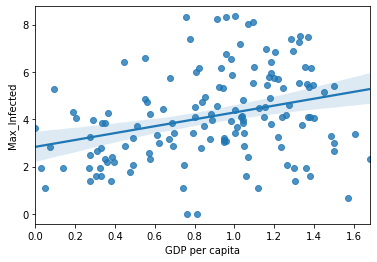

In [24]:
sns.regplot(x, np.log(y))

In [ ]:
#Plotting Social support vx  Max_Infected

In [ ]:
#Plotting Social support vx  Max_Infected